# CC3001 2023-1 - Tarea 6: Quicksort
# Nombre: Luciano Márquez
Profesores: Iván Sipirán, Nelson Baloian, Patricio Poblete




En esta tarea, usted debe comparar el desempeño de la versión original de Quicksort con el de la variante "Mediana de 3". En la primera, el método de partición debe elegir el pivote como el primer elemento del sub arreglo que está particionando. En la segunda, el pivote debe elegirse como la mediana entre el primero, el del medio y el último elemento. Usted debe entregar un link a su tarea en `colab`.

#Módulos

In [ ]:
#modulos usados en esta tarea:
import numpy as np
import random
import time
import pandas as pd
import matplotlib.pyplot as plt

---
# Quicksort original




La versión que se vio en cátedra de Quicksort elige el pivote como un elemento escogido al azar de entre los del arreglo. Para esta tarea vamos a elegir el pivote como el primer elemento del subarreglo para evitar usar la función random.randint() de python que puede ser muy lenta. Dado que para esta tarea los arreglos a ordenar se generarán de manera aleatoria, el primer elemento de la serie se puede ver como un elemento escogido al azar. Sin embargo, esta no es una práctica recomendable en la realidad, ya que si el arreglo viene ordenado, esto llevará a que se tenga el peor caso de Quicksort. La implementación que usaremos de Quicksort es la siguiente:

In [ ]:
def quicksort(a):
  global c
  c = 0
  qsort(a,0,len(a)-1)

def qsort(a,i,j): # ordena a[i],...,a[j]
    if i<j: # quedan 2 o más elementos por ordenar
      k=particion(a,i,j)
      qsort(a,i,k-1)
      qsort(a,k+1,j)

def particion(a,i,j): # particiona a[i],...,a[j], retorna posición del pivote
    global c
    # a[i] es el pivote
    s=i # invariante: a[i+1..s]<=a[i], a[s+1..t]>a[i]
    #print(a)
    for t in range(s,j):
      c += 1 #comparaciones
      #print(f"if {a[t+1]} <= {a[i]}")
      if a[t+1]<=a[i]:
        #print("true")

        (a[s+1],a[t+1])=(a[t+1],a[s+1])
        #print(f"swap {a[t+1]} <-> {a[s+1]}",a)

        s=s+1
    # mover pivote al centro
    (a[i],a[s])=(a[s],a[i])
    #print("pivote al centro: ", a)
    return s

In [ ]:
def chequea_orden(a):
    print("Ordenado" if np.all(a[:-1]<=a[1:]) else "Desordenado")

In [ ]:
a = np.random.random(5)
print(a)
chequea_orden(a)
quicksort(a)
print(a)
chequea_orden(a)

[0.16393607 0.30143629 0.59728532 0.72282785 0.35047181]
Desordenado
[0.16393607 0.30143629 0.35047181 0.59728532 0.72282785]
Ordenado


# La tarea: Quicksort con mediana de tres

Usted debe programar una partición que determine el pivote como la mediana de tres elementos escogido entre el primer, el del medio y el último del segmento a particionar. Para esto, debe modificar el algoritmo de partición de modo que  re-ordene estos 3 elementos dejando en $a[i]$ el mínimo de los 3, en $a[i+1]$ la mediana de los 3 y en $a[j]$ el máximo de los 3. Luego, se aplica el algoritmo de partición ya conocido al segmento $a[i+2],\ldots,a[j-1]$, con $a[i+1]$ como pivote. Al terminar, el pivote se mueve al centro y se retorna su posición.

Otro cambio que se debe hacer es tratar los casos de arreglos de tamaño $0$, $1$ y $2$ como casos de borde, y aplicar ``qsort`` recursivo solo a arreglos de tamaño mayor o igual a 3.

En el siguiente recuadro escriba su algoritmo modificado y luego ejecute las instrucciones de prueba del recuadro siguiente.

In [ ]:
#version encontrando 3 elementos al azar

def quicksort3(a):
  global c3
  c3 = 0
  qsort3(a,0,len(a)-1)

#Esta es la versión del apunte que deberá modificar
def qsort3(a,i,j): # ordena a[i],...,a[j]
  if len(a) <= 1:
    pass
  elif len(a) == 2:
    if a[0] > a[1]:
      a[0], a[1] = a[1], a[0]
  else:
    if i < j:
      k = particionMedianaDe3(a,i,j)
      qsort3(a,i,k-1)
      qsort3(a,k+1,j)

#Implementar esta función de acuerdo al enunciado
def particionMedianaDe3(a,i,j): # particiona a[i],...,a[j], retorna posición del pivote
  global c3
  L = [a[i], a[i+1], a[j]] #se forma una lista con los 3 elementos de interés

  #se ordenan estos elementos de menor a mayor
  if L[0] > L[1]:
    L[0], L[1] = L[1], L[0]
  if L[0] > L[2]:
    L[0], L[2] = L[2], L[0]
  if L[1] > L[2]:
    L[1], L[2] = L[2], L[1]

  a[i], a[i+1], a[j] = L[0], L[1], L[2] #se reasignan

  s = i+1 #i + 1 es el pivote

  for t in range(i+1, j-1):
    c3 += 1

    if a[t+1] <= a[i+1]:

      (a[s+1], a[t+1]) = (a[t+1], a[s+1])

      s += 1

  a[i+1], a[s] = a[s], a[i+1]
  return s

In [ ]:
a = np.random.random(5)
print(a)
chequea_orden(a)
quicksort3(a)
print(a)
chequea_orden(a)

[0.21731747 0.87457474 0.68642854 0.24285458 0.55100824]
Desordenado
[0.21731747 0.24285458 0.55100824 0.68642854 0.87457474]
Ordenado


Una vez programada la variante quicksort con mediana de tres, se le pide que mida el tiempo promedio que ambas versiones demoran en ordenar y cuente además el número promedio de comparaciones que se hacen dentro de la función de partición para las dos versiones operando sobre el mismo arreglo. Para eso debe crear arreglos con elementos generados al azar (use `np.random.random(n)`, donde `n` es el número de elementos), hacer una copia de él y ordenar uno con el método quicksort original y el otro con el método de mediana de tres, registrando el tiempo que demora cada ordenamiento y la cantidad de comparaciones. Este proceso debe ejecutarlo 15 veces y sacar el promedio del tiempo y de comparaciones para cada versión para un `n` fijo.

Repita el procedimiento para `n` = 100, 500, 1000, 5000, 10000, 20000 y 40000, completando así una tabla similar a la que se ve a continuación.

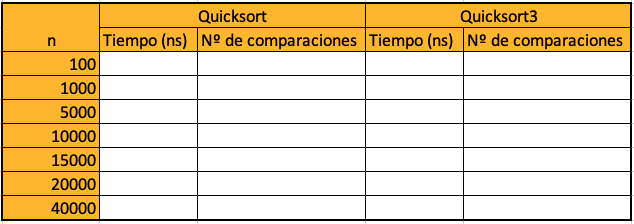


Una vez completada la tabla grafique sus resultados (de la forma que estime más conveniente presentarlos) e incluya el gráfico al final de  este documento. Para tomar el tiempo que demora un proceso puede usar la función `time.gettime_ns(0)` que registra el tiempo actual en nanosegundos que han pasado desde el 1/1/1970 00:00 horas. Puede usarlo de la siguiente manera:

In [ ]:
a = np.random.random(5000)
t1 = time.clock_gettime_ns(0)
quicksort(a)
t2 = time.clock_gettime_ns(0)
print("el tiempo que demoró el proceso fue de ",(t2-t1),"nanosegundos")

el tiempo que demoró el proceso fue de  51040191 nanosegundos


Para contar las comparaciones puede usar variables globales que se incrementan convenientemente. Solo cuente las comparaciones que se hacen en el proceso de partición (dentro del `for`). Tenga sumo cuidado de asegurarse que cada vez que se corra el experimento (ordenamiento del arreglo generado al azar por los dos métodos) estos reciban una copia del arreglo original desordenado y no una referencia al arreglo que ya fue ordenado en una instancia anterior. Programe las instrucciones que ejecuten el experimento descrito anteriormente, en el siguiente recuadro:

#Experimento

In [ ]:
# listas que seran los valores de la tabla y posteriormente de los gráficos
ns = [100,1000, 5000, 10000, 15000, 20000, 40000]
t_prom, t_prom3, c_prom, c_prom3 = [0,0,0,0,0,0,0],[0,0,0,0,0,0,0],[0,0,0,0,0,0,0],[0,0,0,0,0,0,0]


# esta función toma un arreglo, lo ordena usando quicksort() y retorna una tupla
# con el tiempo que se tardó esta operación y cuantas comparaciones se hicieron
def test_qs(a):
  t1 = time.clock_gettime_ns(0)
  quicksort(a)
  count = c
  t2 = time.clock_gettime_ns(0)

  return (t2-t1, count)

# esta función toma un arreglo, lo ordena usando quicksort3() y retorna una tupla
# con el tiempo que se tardó esta operación y cuantas comparaciones se hicieron
def test_qs3(b):
  t1 = time.clock_gettime_ns(0)
  quicksort3(b)
  count = c3
  t2 = time.clock_gettime_ns(0)

  return (t2-t1, count)


In [ ]:
# experimento que testea cada valor de n en la lista ns 15 veces y actualiza las listas
# de la tabla con el promedio de estas
for p in range(0,len(ns)): #iterador en ns
  n = ns[p]
  dt, dt3, dc, dc3 = 0, 0, 0, 0 #reseteo de las cuentas
  for i in range(0,15): #15 veces el experimento
    r = np.random.random(n) #se crea el arreglo para testear
    a, b = np.copy(r), np.copy(r) #se copian los arreglos para evitar testear un arreglo ordenado
    q = test_qs(a) #test para quicksort()
    q3 = test_qs3(b) #test para quicksort3()
    dt, dt3, dc, dc3 = dt + q[0]/15, dt3 + q3[0]/15, dc + q[1]/15, dc3 + q3[1]/15 #suma de la iteración actual

  t_prom[p], t_prom3[p], c_prom[p], c_prom3[p] = dt, dt3, dc, dc3 #se guardan los resultados

#Tabla y Gráfico

In [ ]:
#usando un dataframe de la libreria pandas
df = pd.DataFrame({
    "n" : ns,
    "tiempo promedio quicksort() [ns]": t_prom,
    "comparaciones promedio quicksort()": c_prom,
    "tiempo promedio quicksort3() [ns]" : t_prom3,
    "comparaciones promedio quicksort3()": c_prom3
})

In [ ]:
#tabla
df.style

,n,tiempo promedio quicksort() [ns],comparaciones promedio quicksort(),tiempo promedio quicksort3() [ns],comparaciones promedio quicksort3()
0,100,486019.466667,656.466667,438882.266667,443.800000
1,1000,8139826.533333,11038.600000,7274392.133333,8380.866667
2,5000,88543318.333333,70257.933333,78508313.666667,55013.333333
3,10000,211605436.666667,156447.200000,186495329.866667,124103.666667
4,15000,455838790.133333,243265.133333,406488435.466667,195463.000000
5,20000,265154444.200000,341148.066667,253767379.333333,273736.800000
6,40000,525528268.200000,735126.733333,523464211.933333,587581.933333


[]

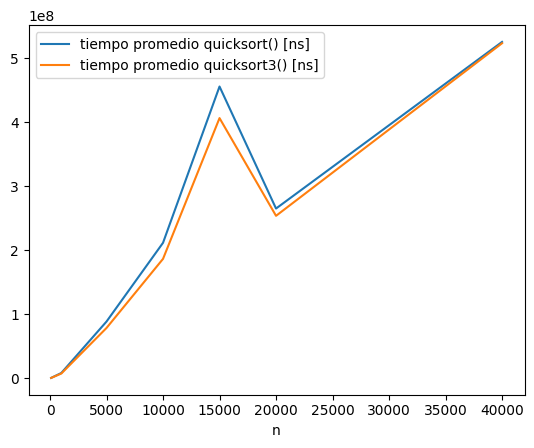

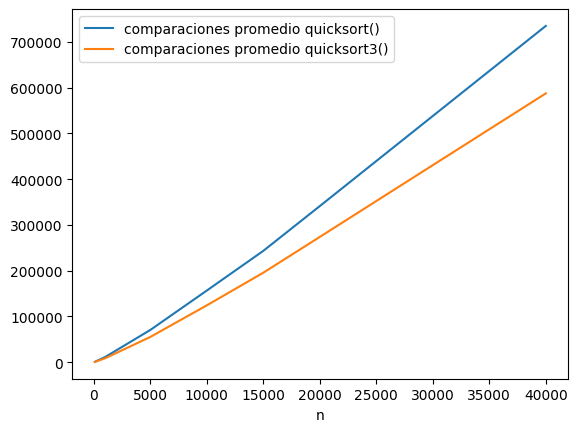

In [ ]:
#graficos
df.plot(x = "n", y = ["tiempo promedio quicksort() [ns]", "tiempo promedio quicksort3() [ns]"])
df.plot(x = "n", y = ["comparaciones promedio quicksort()","comparaciones promedio quicksort3()"])
plt.plot()